In [1]:
import cv2 as cv
import numpy as np
import scipy
from scipy.stats.kde import gaussian_kde
from scipy.signal import wiener
import matplotlib.pyplot as plt
import skimage.filters as imgFilters

In [2]:
img  = cv.imread("../dog.jpg")
img = img/255
img = cv.resize(img,(400,400))

In [3]:
cv.imshow('Original Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
# create Gaussian noise
x,y,c = img.shape
mean = 0
var = 0.01
sigma = np.sqrt(var)
n = np.random.normal(loc = mean, scale = sigma, size = (x,y,c))

In [5]:
cv.imshow('Gaussian noise', n)
cv.waitKey(0)
cv.destroyAllWindows()

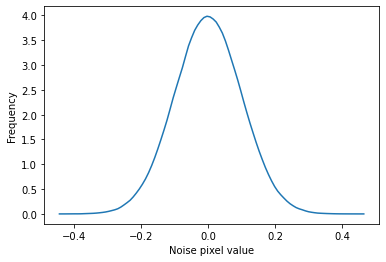

In [6]:
# display the probability density function (pdf)
kde = gaussian_kde(n.reshape(int(x*y*c)))
dist_space = np.linspace(np.min(n), np.max(n), 100)
plt.plot(dist_space, kde(dist_space))
plt.xlabel('Noise pixel value')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Add a Gaussian noise to the image
g = img + n

cv.imshow('Original Image', img)
cv.imshow('Corrupted Image', g)
cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
filtered_img = wiener(g, (5,5,1))

In [13]:
cv.imshow('Corrupted Image', g)
cv.imshow('WienerFilteredImage', filtered_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [14]:
mean = cv.blur(g, (3,3))
median = imgFilters.median(g)


# Apply MIN Filter on the Gaussian noise image
minimum_filter = scipy.ndimage.minimum_filter(g, 3)

# Apply MAX Filter on the Gaussian noise image
maximum_filter = scipy.ndimage.maximum_filter(g,3)

In [15]:
display = [g, filtered_img, mean, median, minimum_filter, maximum_filter]
label = [ 'Gaussian Noise','WienerFilteredImage', 'MEAN FILTER','MEDIAN FILTER','Minimum Filter','Maximum Filter']

for i in range(len(display)):
    cv.imshow(label[i], display[i])
    
cv.waitKey(0)
cv.destroyAllWindows()